In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/b2/scratch/ahringer/jj374/lab/relmapping


In [2]:
# Load sites and read counts
fp_sites = 'annot/S1_accessible_sites/S1a_accessible_sites.tsv'
df_sites = pd.read_csv(fp_sites, sep='\t')#.query('(atac_source == "atac_wt_pe") | (atac_source == "atac_wt_se")')
df_sites.head()

,chrom,start,end,atac_mode,atac_source,atac_wt_emb_height,atac_wt_l1_height,atac_wt_l2_height,atac_wt_l3_height,atac_wt_l4_height,...,atac_glp1_d7_rep1_maxcount,atac_glp1_d7_rep2_maxcount,atac_glp1_d10_rep1_maxcount,atac_glp1_d10_rep2_maxcount,atac_glp1_d14_rep1_maxcount,atac_glp1_d14_rep2_maxcount,atac_gon2gem1_ya_rep1_maxcount,atac_gon2gem1_ya_rep2_maxcount,atac_gon2gem1_d3_rep1_maxcount,atac_gon2gem1_d3_rep2_maxcount
0,chrI,1870,2092,1981,atac_wt_se,1.621415,1.459215,1.354735,1.672520,1.204265,...,33.0,33.0,36.0,42.0,28.0,58.0,28.0,32.0,33.0,59.0
1,chrI,3809,3994,3901,atac_wt_pe,61.688004,55.224873,69.346062,123.587425,165.852905,...,1820.0,2072.0,1650.0,2596.0,1316.0,1422.0,2601.0,4677.0,2858.0,2812.0
2,chrI,4302,4410,4356,atac_wt_se,1.458345,2.518715,2.017625,3.193275,5.416205,...,50.0,37.0,67.0,65.0,39.0,58.0,72.0,98.0,59.0,98.0
3,chrI,11245,11465,11355,atac_wt_pe,2.679690,4.330160,9.348130,10.026175,10.876090,...,452.0,554.0,412.0,668.0,314.0,555.0,371.0,458.0,375.0,416.0
4,chrI,13087,13207,13147,atac_wt_pe,5.160855,3.462505,3.761785,3.173980,2.518795,...,53.0,61.0,63.0,116.0,68.0,103.0,76.0,95.0,64.0,95.0


In [3]:
# Peak heights for every hypersensitive site (sizefactor-normalised)
for stage in itertools.islice(config['stages_wt'] + config['stages_glp1'], None):
    print(stage)
    fp_ = pf('atac_%(stage)s' % locals(), 'normalised_coverage', '.bw', 'atac728_geo')
    df_sites['atac_%(stage)s_height_sizefactor' % locals()] = list(map(np.nanmax, yp.read_regions(fp_, df_sites.chrom.tolist(), df_sites.start.tolist(), df_sites.end.tolist())))

wt_emb
wt_l1
wt_l2
wt_l3
wt_l4
wt_ya
glp1_ya
glp1_d3
glp1_d7
glp1_d10
glp1_d14


In [4]:
# Peak heights for every hypersensitive site (SPMR-normalised)
for stage in itertools.islice(config['stages_wt'] + config['stages_glp1'], None):
    print(stage)
    fp_ = pf('atac728_%(stage)s' % locals(), 'tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.macs2_se_extsize150_shiftm75_keepdup_all.mean_by_stage', '.bw', 'atac728')
    df_sites['atac_%(stage)s_height_spmr' % locals()] = list(map(np.nanmax, yp.read_regions(fp_, df_sites.chrom.tolist(), df_sites.start.tolist(), df_sites.end.tolist())))

wt_emb
wt_l1
wt_l2
wt_l3
wt_l4
wt_ya
glp1_ya
glp1_d3
glp1_d7
glp1_d10
glp1_d14


(0, 20)

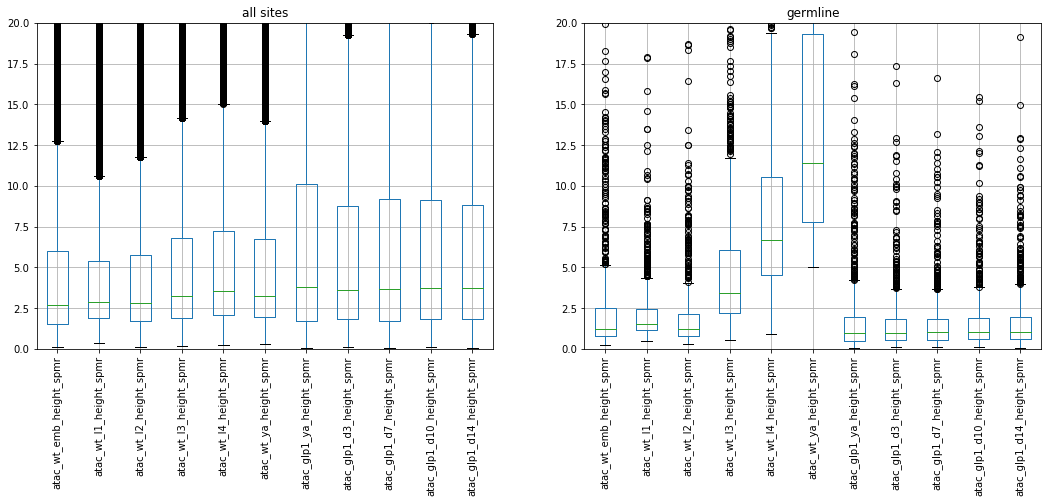

In [5]:
# Peak heights, SPMR-normalised
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.title('all sites')
df_sites[['atac_%s_height_spmr' % (s,) for s in config['stages_wt'] + config['stages_glp1']]].boxplot()
for tick in plt.gca().get_xticklabels(): tick.set_rotation(90)
plt.gca().set_ylim([0, 20])

df_ = pd.read_csv('annot/S1_accessible_sites/S1a_accessible_sites_with_germline.tsv', sep='\t')
plt.subplot(1, 2, 2)
plt.title('germline')
df_sites.loc[df_['atac_is_germline_specific'], ['atac_%s_height_spmr' % (s,) for s in config['stages_wt'] + config['stages_glp1']]].boxplot()
for tick in plt.gca().get_xticklabels(): tick.set_rotation(90)
plt.gca().set_ylim([0, 20])

(0, 5)

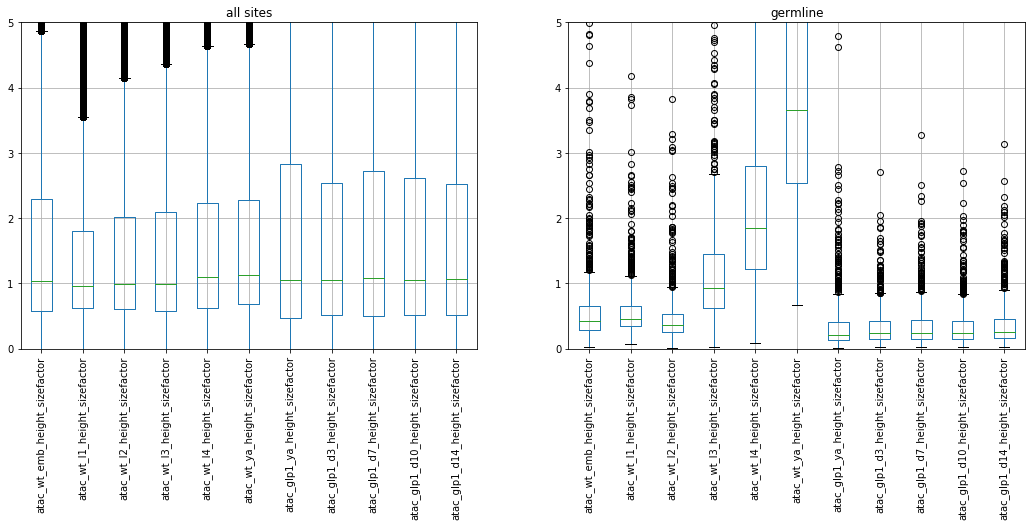

In [6]:
# Peak heights, sizefactor-median normalised
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.title('all sites')
df_sites[['atac_%s_height_sizefactor' % (s,) for s in config['stages_wt'] + config['stages_glp1']]].boxplot()
for tick in plt.gca().get_xticklabels(): tick.set_rotation(90)
plt.gca().set_ylim([0, 5])

df_ = pd.read_csv('annot/S1_accessible_sites/S1a_accessible_sites_with_germline.tsv', sep='\t')
plt.subplot(1, 2, 2)
plt.title('germline')
df_sites.loc[df_['atac_is_germline_specific'], ['atac_%s_height_sizefactor' % (s,) for s in config['stages_wt'] + config['stages_glp1']]].boxplot()
for tick in plt.gca().get_xticklabels(): tick.set_rotation(90)
plt.gca().set_ylim([0, 5])

In [7]:
step = 'tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all'
df_spmr = pd.DataFrame()
for rep in itertools.islice(config['stages_wt_by_rep'] + config['stages_glp1_by_rep'], None):
    fp_ = pf('atac728_' + rep, step, '_treat_pileup.bw', 'atac728')
    print(fp_)
    df_spmr[rep] = list(map(np.nanmax, yp.read_regions(fp_, 
        df_sites.chrom.tolist(), df_sites.start.tolist(), df_sites.end.tolist())))

atac728/tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all/atac728_wt_emb_rep1.tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all_treat_pileup.bw
atac728/tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all/atac728_wt_emb_rep2.tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all_treat_pileup.bw
atac728/tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all/atac728_wt_l1_rep1.tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all_treat_pileup.bw
atac728/tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all/atac728_wt_l1_rep2.tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all_treat_pileup.bw
atac728/tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_exts

In [8]:
step = 'tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all_noSPMR.sfnorm'
df_sfnorm = pd.DataFrame()
for rep in itertools.islice(config['stages_wt_by_rep'] + config['stages_glp1_by_rep'], None):
    fp_ = pf('atac728_' + rep, step, '.bw', 'atac728')
    print(fp_)
    df_sfnorm[rep] = list(map(np.nanmax, yp.read_regions(fp_, 
        df_sites.chrom.tolist(), df_sites.start.tolist(), df_sites.end.tolist())))

atac728/tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all_noSPMR.sfnorm/atac728_wt_emb_rep1.tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all_noSPMR.sfnorm.bw
atac728/tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all_noSPMR.sfnorm/atac728_wt_emb_rep2.tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all_noSPMR.sfnorm.bw
atac728/tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all_noSPMR.sfnorm/atac728_wt_l1_rep1.tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all_noSPMR.sfnorm.bw
atac728/tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all_noSPMR.sfnorm/atac728_wt_l1_rep2.tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all_noSPMR.sfnorm.bw
atac728/tg_se.

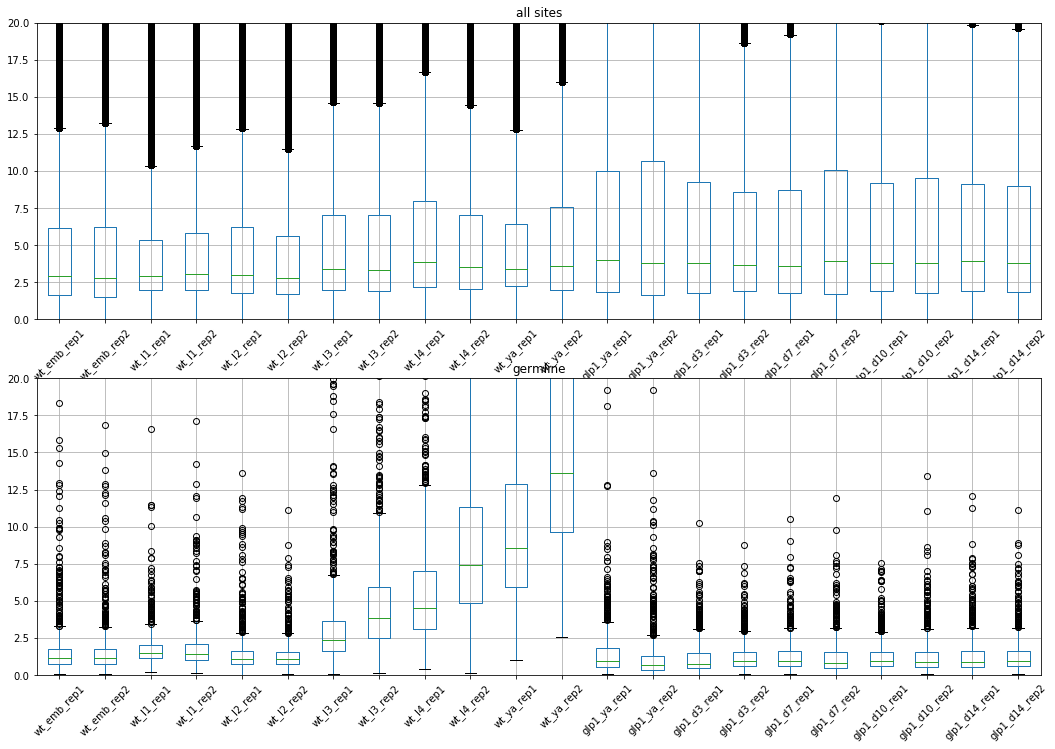

In [13]:
# SPMR-normalised
plt.figure(figsize=(18, 12))
plt.subplot(2, 1, 1)
plt.title('all sites')
df_spmr.boxplot()
plt.gca().set_ylim([0, 20])
for tick in plt.gca().get_xticklabels(): tick.set_rotation(45)

plt.subplot(2, 1, 2)
plt.title('germline')
df_ = pd.read_csv('annot/S1_accessible_sites/S1a_accessible_sites_with_germline.tsv', sep='\t')
df_spmr.loc[df_['atac_is_germline_specific']].boxplot()
plt.gca().set_ylim([0, 20])
for tick in plt.gca().get_xticklabels(): tick.set_rotation(45)

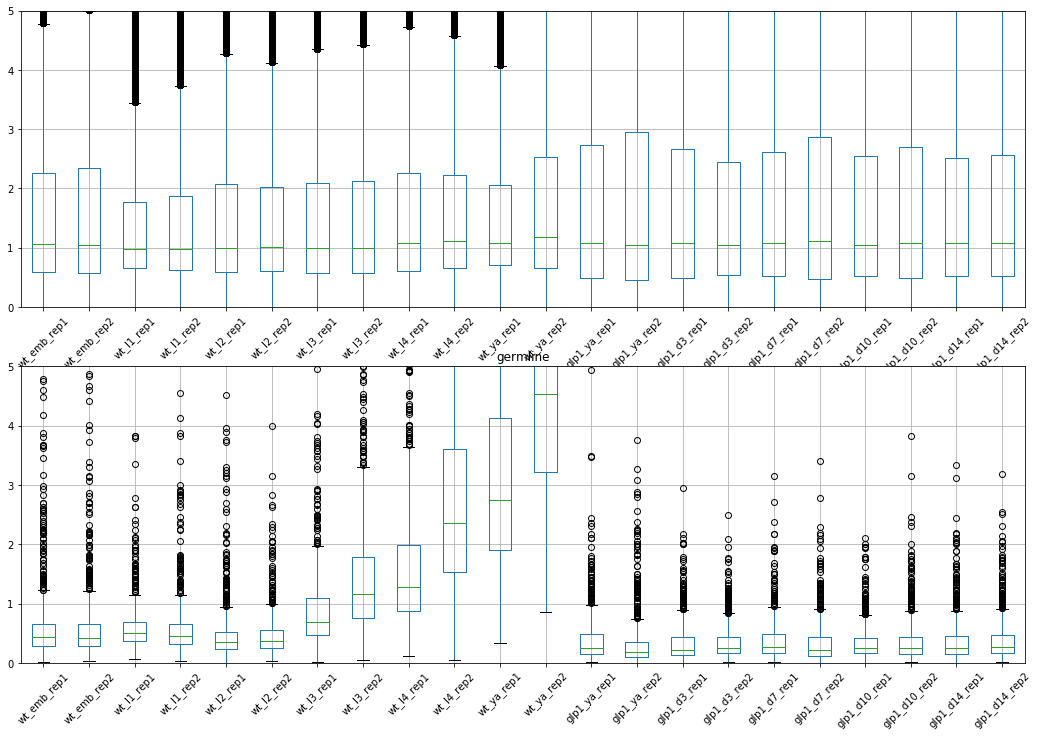

In [12]:
# Sizefactor-normalised
plt.figure(figsize=(18, 12))
plt.title('all sites')
plt.subplot(2, 1, 1)
df_sfnorm.boxplot()
plt.gca().set_ylim([0, 5])
for tick in plt.gca().get_xticklabels(): tick.set_rotation(45)

plt.subplot(2, 1, 2)
plt.title('germline')
df_ = pd.read_csv('annot/S1_accessible_sites/S1a_accessible_sites_with_germline.tsv', sep='\t')
df_sfnorm.loc[df_['atac_is_germline_specific']].boxplot()
plt.gca().set_ylim([0, 5])
for tick in plt.gca().get_xticklabels(): tick.set_rotation(45)